## Paper -  Prioritized Experience Replay 

### Main Focus

Prioritize useful experiences , so as to replay important transitions more frequently , and learn more efficiently.

Goal : The paper demonstrates how prioritizing which transitionns are replayed can make experience replay more efficient and effective that if all transitions are replayed uniformly. This is based on the idea than teh agent can learn more effectively from some transitions than from others.


### Problems Idenitfied


- Experience replay lets online RL agents remember and reuse experinces from the past .In past these experience transitions were uniformly sampled from a replay memory.
- Some experinces can not be immediately useful to the agent , but mught bceome so when the agent competeance increases.

### Related literature

- Experiences with high magnitude TD error also are replayed more often 
- Prioritized sweeping (Moore & Atkeson, 1993; Andre et al., 1998) selects which state to update next, prioritized according to the change in value, if that update was executed.The TD error provides one way to measure these priorities
- TD-errors have also been used as a prioritization mechanism for determining where to focus resources, for example when choosing where to explore (White et al., 2014) or which features to select

## Important parts 

### Key focus : Prioritizing with TD -error
- The magnitude of transitions TD error $\delta$ , which is an indicator of how'surprising' or unexpected a transition was, which can help measure the importance of each transition. NOte: TD error can be a poor estimate in some circumstances where rewards are noisy
- The 'greedy TD-error prioritization' algorithm stores the last encountered TD error along with each transition in the replay memory and the transition with the largest absolute TD error is replayed from the memory.

### Key change 1 applied on DDQN :Stochastic Prioritization
- The above algorithm has issues of transitions that have low TD error on first visit nt being repalyed for a long time as to avoid expensive sweeps over the entire replay memory, the TD erros are only updated for the transitions that are replayed.
- Secondly , the above algorithm is sensitive to noise spikes , which can be made worse by bootstrapping where apporaximation errors become another source of noise.

- To overcome these issues, a stochastic sampling method is introduced that interpolates between pure greedy prioritization and uniform random sampling
- The first variant we consider is the direct, proportional prioritization where $\mathcal{p}_i = |\delta_i| + \epsilon$, where $\epsilon$ is a small positive constant that prevents the edge-case of transitions not being revisited once their error is zero. The second variant is an indirect, rank-based prioritization where $\mathcal{p}_{i}=1/\mathcal{rank(i)}$, where rank(i) is the rank of transition i when the replay memory is sorted according to |δi|.
     - rank-based prioritization- more robust as it is not affected by outliers aor error magnitudes.
     - proportional prioritization
    
- Both variants of stochastic prioritization lead to large speed-ups over the uniform baseline

### Key change 2 applied on DDQN :Annealing the bias/Importance Sampling 

- Prioritized replay introduces bias because it changes this distribution in an uncontrolled fashion, and therefore changes the solution that the estimates will converge to (even if the policy and state distribution are fixed)
- Importance sampling weights used to correct the bias is 

\begin{equation}
 \mathcal{w}_i = \bigg(\frac{1}{\mathcal{N}} \times \frac{1}{\mathcal{P_i}}\bigg)^{\beta}
\end{equation}

- The amount of importance sampling correction is *annealed* over time , by using the hyperparaemter $\beta$ that reaches 1 only at the end of the training 

## Architecture details


- The identical neural network architecture, learning algorithm, replay memory and evaluation is used as the setup for the baselines , Nature DQN and Double Dqn 
- The only difference is the mechanism for sampling transitions from the replay memory, with is now done according to Algorithm 1(in the image below) instead of uniformly.

### Hyper paramters

- reduced the step size $\mathcal(n)$ by a factor 4 compared to DDQN setup
- Empirically approximated values of $\alpha =0.7$ and $\beta_{o}=0.5$ for rank-based variant
- Empirically approximated values of $\alpha =0.6$ and $\beta_{o}=0.4$ for proportional variant

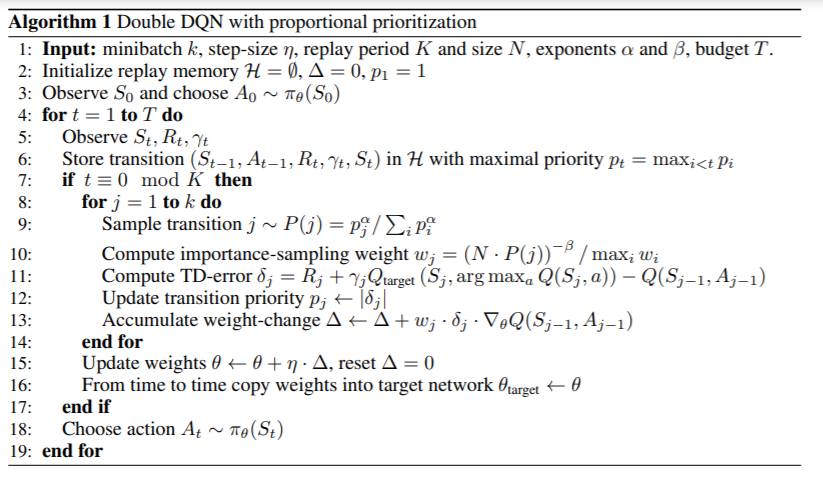

In [1]:
from IPython.display import Image
Image(filename='PER.png')

### Evaluation Metrics
1) Quality of best policy in terms of average score per episode (using Human starts) 

2) Learning speed

### Interesting takeways
1) Interaction of prioritzed replay with deep NN- The authors found that when we distinguish learning the value given a representation (i.e., the top layers) from learning an improved representation (i.e., the bottom layers), then transitions for which the representation is good will quickly reduce their error and then be replayed much less, increasing the learning focus on others where the representation is poor, thus putting more resources into distinguishing aliased states – if the observations and network capacity allow for it.

2) PER helps with some fraction of the visited transitions are never replayed before they drop out of the sliding window memory, and many more are replayed for the first time only long after they are encountered. Also, uniform sampling is implicitly biased toward out-of-date transitions that were generated by a policy that has typically seen hundreds of thousands of updates since. Prioritized replay with its bonus for unseen transitions directly corrects the first of these issues, and also tends to help with the second one, as more recent transitions tend to have larger error – this is because old transitions will have had more opportunities to have them corrected, and because novel data tends to be less well predicted by the value function


#### *Would recommend to give the time to read this amazingly written paper for specifics of the environment.*